In [1]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('D:\Desktop\simulacion_3\\Notebooks\data_latinoamerica.csv')
df = pd.read_csv("../data/data_latinoamerica.csv")

In [3]:
df = df[df['location_key'] == 'BR']

In [4]:
df.head(20)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
550005,BR,2020-01-01,BR,Brazil,380.0,0.0,380.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550006,BR,2020-01-02,BR,Brazil,906.0,0.0,1286.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550007,BR,2020-01-03,BR,Brazil,478.0,0.0,1764.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550008,BR,2020-01-04,BR,Brazil,1848.0,0.0,3612.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550009,BR,2020-01-05,BR,Brazil,1095.0,0.0,4707.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550010,BR,2020-01-06,BR,Brazil,821.0,0.0,5528.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550011,BR,2020-01-07,BR,Brazil,607.0,0.0,6135.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550012,BR,2020-01-08,BR,Brazil,440.0,0.0,6575.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550013,BR,2020-01-09,BR,Brazil,173.0,0.0,6748.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0
550014,BR,2020-01-10,BR,Brazil,74.0,0.0,6822.0,0.0,NaN,212559409.0,...,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6,0.0,0.0


In [5]:
# Identificar las columnas que contienen valores 0
columns_with_zeros = df.columns[(df == 0).any()]

# Mostrar las columnas y las filas con valores 0
for column in columns_with_zeros:
    zero_rows = df[df[column] == 0]
    print(f"Column '{column}' has zero values in the following rows:")
    print(zero_rows)

# Alternativamente, para ver solo las columnas que tienen valores 0
print("Columns with zero values:", columns_with_zeros.tolist())

Column 'new_confirmed' has zero values in the following rows:
       location_key        date country_code country_name  new_confirmed  \
550060           BR  2020-02-25           BR       Brazil            0.0   
550062           BR  2020-02-27           BR       Brazil            0.0   
550063           BR  2020-02-28           BR       Brazil            0.0   
550065           BR  2020-03-01           BR       Brazil            0.0   
550066           BR  2020-03-02           BR       Brazil            0.0   
550067           BR  2020-03-03           BR       Brazil            0.0   
550073           BR  2020-03-09           BR       Brazil            0.0   

        new_deceased  cumulative_confirmed  cumulative_deceased  \
550060           0.0                   0.0                  0.0   
550062           0.0                   1.0                  0.0   
550063           0.0                   1.0                  0.0   
550065           0.0                   2.0                  0

### Contar cuantos valores Nulos tiene cada columna

In [6]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              2
new_deceased                               2
cumulative_confirmed                       2
cumulative_deceased                        2
cumulative_vaccine_doses_administered    384
average_temperature_celsius                7
minimum_temperature_celsius                6
maximum_temperature_celsius                6
rainfall_mm                               10
relative_humidity                          7
new_recovered                              3
cumulative_recovered                       3
dtype: int64


### Contar cuantos 0 tiene cada columna

In [7]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 7 rows with zero values.
Column 'new_deceased' has 76 rows with zero values.
Column 'cumulative_confirmed' has 1 rows with zero values.
Column 'cumulative_deceased' has 76 rows with zero values.
Column 'rainfall_mm' has 979 rows with zero values.
Column 'new_recovered' has 59 rows with zero values.
Column 'cumulative_recovered' has 59 rows with zero values.

Counts of zero values per column: {'new_confirmed': 7, 'new_deceased': 76, 'cumulative_confirmed': 1, 'cumulative_deceased': 76, 'rainfall_mm': 979, 'new_recovered': 59, 'cumulative_recovered': 59}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [8]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_br = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [9]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_br.drop(columns=columns_to_drop, inplace=True)


C:\Users\Casa\AppData\Local\Temp\ipykernel_16536\2188576134.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br.drop(columns=columns_to_drop, inplace=True)


In [10]:
df_br.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
550005,BR,2020-01-01,BR,Brazil,380.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,26.740741,75.765988,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550006,BR,2020-01-02,BR,Brazil,906.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,26.379630,77.359711,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550007,BR,2020-01-03,BR,Brazil,478.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,25.777778,82.525872,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550008,BR,2020-01-04,BR,Brazil,1848.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,24.962963,85.844670,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6
550009,BR,2020-01-05,BR,Brazil,1095.0,0.0,NaN,212559409.0,104435783.0,108123626.0,...,25.907407,81.640759,21846507.0,8241430.0,134981.0,75.672,188.528,91.421,29.9,16.6


In [11]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_br.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    382
average_temperature_celsius                3
relative_humidity                          3
dtype: int64


In [12]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_br.columns[(df_br == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_br[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 7 rows with zero values.
Column 'new_deceased' has 76 rows with zero values.

Counts of zero values per column: {'new_confirmed': 7, 'new_deceased': 76}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [13]:
# Imputación con la media para columnas específicas
df_br['average_temperature_celsius'] = df_br['average_temperature_celsius'].fillna(df_br['average_temperature_celsius'].mean())
df_br['relative_humidity'] = df_br['relative_humidity'].fillna(df_br['relative_humidity'].mean())


C:\Users\Casa\AppData\Local\Temp\ipykernel_16536\3831941743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br['average_temperature_celsius'] = df_br['average_temperature_celsius'].fillna(df_br['average_temperature_celsius'].mean())
C:\Users\Casa\AppData\Local\Temp\ipykernel_16536\3831941743.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br['relative_humidity'] = df_br['relative_humidity'].fillna(df_br['relative_humidity'].mean())


In [14]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-17'
fecha_limite = '2020-12-29'
df_br.loc[df['date'] < fecha_limite] = df_br.loc[df['date'] < fecha_limite].fillna(0)

In [15]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 7 rows with zero values.
Column 'new_deceased' has 76 rows with zero values.
Column 'cumulative_confirmed' has 1 rows with zero values.
Column 'cumulative_deceased' has 76 rows with zero values.
Column 'rainfall_mm' has 979 rows with zero values.
Column 'new_recovered' has 59 rows with zero values.
Column 'cumulative_recovered' has 59 rows with zero values.

Counts of zero values per column: {'new_confirmed': 7, 'new_deceased': 76, 'cumulative_confirmed': 1, 'cumulative_deceased': 76, 'rainfall_mm': 979, 'new_recovered': 59, 'cumulative_recovered': 59}


In [16]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_br.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,955.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,35361.61,702.22,133337957.08,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,27.93,58.01,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
std,35218.26,752.05,144463706.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.72,17.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,-573.00,0.00,0.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,17.44,14.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
25%,11311.50,160.25,0.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,26.30,43.80,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
50%,27030.50,466.00,55590694.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,27.55,58.54,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
75%,50016.50,1034.75,300935172.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,29.33,72.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
max,298408.00,4249.00,347356987.00,212559409.00,104435783.00,108123626.00,25.43,0.75,29076910.00,31160446.00,...,39.14,93.07,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [17]:
#calcular columna vacunas administradas por dia
g=df_br.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_br['vaccine_doses_administered_for_day']=h

df_br.vaccine_doses_administered_for_day.max()

C:\Users\Casa\AppData\Local\Temp\ipykernel_16536\2492315874.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br['vaccine_doses_administered_for_day']=h


2956866.0

In [18]:
df_br.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

C:\Users\Casa\AppData\Local\Temp\ipykernel_16536\220324710.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br.drop(columns='cumulative_vaccine_doses_administered', inplace=True)


In [19]:
# Crear la columna del acumulado de vacunas diarias
df_br['cumulative_vaccine_doses_administered'] = df_br['vaccine_doses_administered_for_day'].cumsum()

col = list(df_br.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_br = df_br[col]
df_br

C:\Users\Casa\AppData\Local\Temp\ipykernel_16536\1109671839.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_br['cumulative_vaccine_doses_administered'] = df_br['vaccine_doses_administered_for_day'].cumsum()


,location_key,date,country_code,country_name,new_confirmed,new_deceased,population,cumulative_vaccine_doses_administered,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
550005,BR,2020-01-01,BR,Brazil,380.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,75.77,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550006,BR,2020-01-02,BR,Brazil,906.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,77.36,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550007,BR,2020-01-03,BR,Brazil,478.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,82.53,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550008,BR,2020-01-04,BR,Brazil,1848.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,85.84,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
550009,BR,2020-01-05,BR,Brazil,1095.00,0.00,212559409.00,0.00,104435783.00,108123626.00,...,81.64,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550974,BR,2022-08-27,BR,Brazil,12386.00,75.00,212559409.00,347014872.00,104435783.00,108123626.00,...,30.86,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,21188.00
550975,BR,2022-08-28,BR,Brazil,3452.00,22.00,212559409.00,347015427.00,104435783.00,108123626.00,...,29.76,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,555.00
550976,BR,2022-08-29,BR,Brazil,12458.00,128.00,212559409.00,347236256.00,104435783.00,108123626.00,...,26.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,220829.00
550977,BR,2022-08-30,BR,Brazil,16806.00,229.00,212559409.00,347269056.00,104435783.00,108123626.00,...,31.93,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60,32800.00


In [20]:
col = list(df_br.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_br = df_br[col]
df_br

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
550005,BR,2020-01-01,BR,Brazil,380.00,0.00,0.00,212559409.00,0.00,104435783.00,...,26.74,75.77,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550006,BR,2020-01-02,BR,Brazil,906.00,0.00,0.00,212559409.00,0.00,104435783.00,...,26.38,77.36,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550007,BR,2020-01-03,BR,Brazil,478.00,0.00,0.00,212559409.00,0.00,104435783.00,...,25.78,82.53,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550008,BR,2020-01-04,BR,Brazil,1848.00,0.00,0.00,212559409.00,0.00,104435783.00,...,24.96,85.84,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550009,BR,2020-01-05,BR,Brazil,1095.00,0.00,0.00,212559409.00,0.00,104435783.00,...,25.91,81.64,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550974,BR,2022-08-27,BR,Brazil,12386.00,75.00,21188.00,212559409.00,347014872.00,104435783.00,...,29.22,30.86,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550975,BR,2022-08-28,BR,Brazil,3452.00,22.00,555.00,212559409.00,347015427.00,104435783.00,...,29.71,29.76,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550976,BR,2022-08-29,BR,Brazil,12458.00,128.00,220829.00,212559409.00,347236256.00,104435783.00,...,30.80,26.39,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60
550977,BR,2022-08-30,BR,Brazil,16806.00,229.00,32800.00,212559409.00,347269056.00,104435783.00,...,29.61,31.93,21846507.00,8241430.00,134981.00,75.67,188.53,91.42,29.90,16.60


In [21]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_br['vaccine_doses_administered_for_day'].quantile(0.25)
Q3 = df_br['vaccine_doses_administered_for_day'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_br[(df_br['vaccine_doses_administered_for_day'] >= lower_bound) & (df_br['vaccine_doses_administered_for_day'] <= upper_bound)]

In [22]:
lower_bound

-725538.75

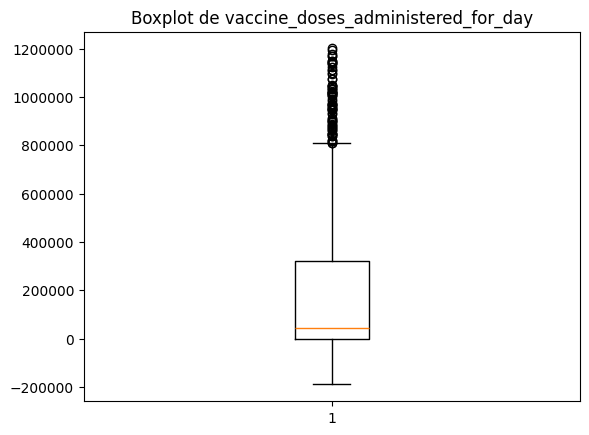

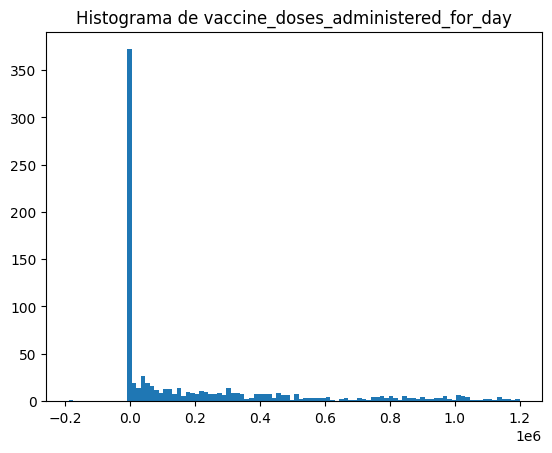

In [23]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

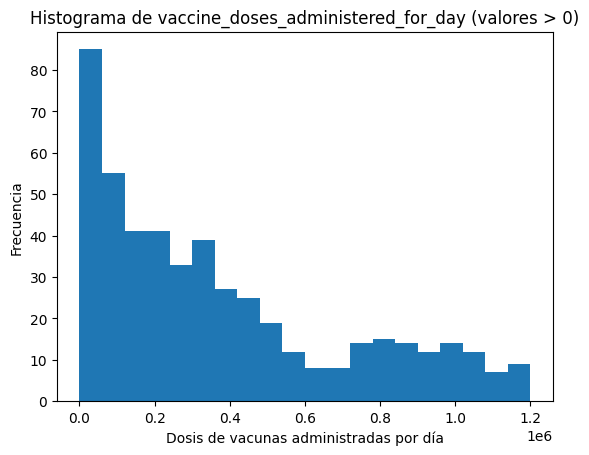

In [26]:
df_filtered_positive = df_filtered[df_filtered['vaccine_doses_administered_for_day'] > 0]

# Crear el histograma
plt.hist(df_filtered_positive['vaccine_doses_administered_for_day'], bins=20)  # El número de bins se puede ajustar a preferencia
plt.title('Histograma de vaccine_doses_administered_for_day (valores > 0)')
plt.xlabel('Dosis de vacunas administradas por día')
plt.ylabel('Frecuencia')
plt.show()

In [27]:
avg_vaccine = round((upper_bound - lower_bound)/2,0)

df_prueba = df_br
# Reemplazar los valores por encima del valor máximo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound else x
)

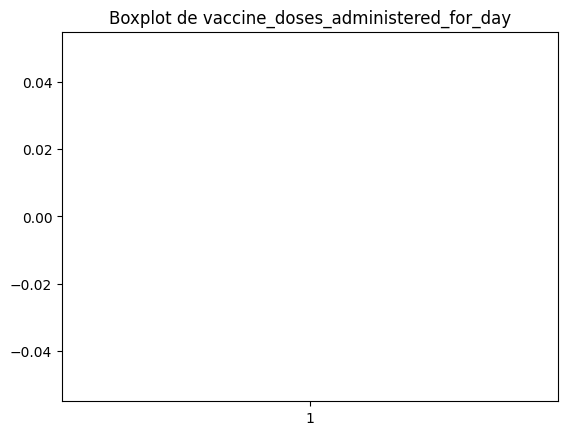

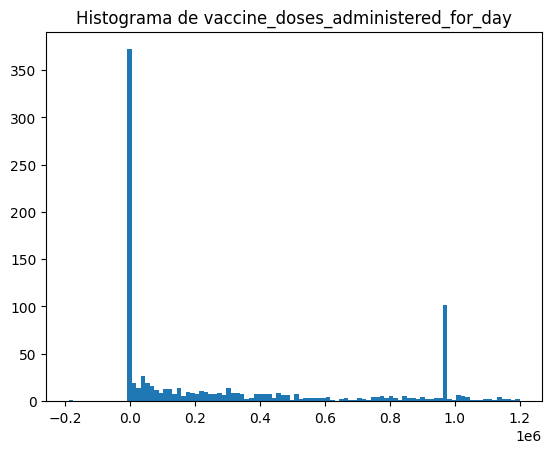

In [32]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_prueba['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_prueba['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [33]:
df_prueba.to_csv('data\processed\covid19_Brasil.csv', index=False)
